<a href="https://colab.research.google.com/github/aunghlaingtun/NYP_ITI_105_MLPrj/blob/main/NYP_ITI_105_Model_Training_Enhanced_ProV3_0_finalRun28.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ITI-105 Machine Learning Project: HDB Resale Price Prediction
## Enhanced Model Training with Comprehensive Hyperparameter Tuning & MLflow

**Student Information:**
- **Name:** Aung Hlaing Tun
- **Student ID:** 6319250G
- **Project Group ID:** AlogoRiddler
- **Date:** 28 Aug 2025

**Enhanced Features:**
- ✅ **3-Step Model Training Workflow**
- ✅ **Comprehensive Hyperparameter Tuning** (GridSearchCV + RandomizedSearchCV)
- ✅ **Professional MLflow Integration** (No Warnings)
- ✅ **Dataset Logging & Tracking**
- ✅ **Model Comparison Dashboard**
- ✅ **Performance Optimization**

## 1. Installation & Dependencies

In [ ]:
# Install required packages
!pip install mlflow pyngrok geopy scikit-learn -q

print("✅ All packages installed successfully!")

In [ ]:
# Cell 1 — install for DagsHub (replace your original install cell)
!pip uninstall -y mlflow -q
!pip install "mlflow<3" dagshub geopy scikit-learn -q

import mlflow, sklearn
print("✅ All packages installed successfully!")
print("📈 MLflow version:", mlflow.__version__)   # must be 2.x for DagsHub
print("🤖 scikit-learn version:", sklearn.__version__)


## 2. Google Drive & Ngrok Configuration

In [ ]:
# Import required libraries
from google.colab import userdata, drive, files
from pyngrok import ngrok
import mlflow
import os
import subprocess
import time

# Mount Google Drive
#drive.mount('/content/drive')

# Configure ngrok with your auth token
NGROK_TOKEN = userdata.get('test2')  # Store in Colab secrets
!ngrok authtoken {NGROK_TOKEN}

print("✅ Google Drive mounted and ngrok configured!")

In [ ]:
# Cell 2 — DagsHub MLflow setup (replaces Drive + ngrok)
from google.colab import userdata
import os, mlflow, dagshub

# Your repo details
USER = "aunghlaingtun"      # DagsHub username/org
REPO = "NYP_ITI_105"        # DagsHub repo name
TOKEN = userdata.get('dagshub')  # Colab secret named 'dagshub'

assert TOKEN, "Colab secret 'dagshub' missing. Add it in Runtime → Secrets."

# Auth for DagsHub MLflow (no ngrok needed)
os.environ["MLFLOW_TRACKING_USERNAME"] = USER
os.environ["MLFLOW_TRACKING_PASSWORD"] = TOKEN

# Point MLflow to your hosted DagsHub tracking server
dagshub.init(repo_owner=USER, repo_name=REPO, mlflow=True)
mlflow.set_tracking_uri(f"https://dagshub.com/{USER}/{REPO}.mlflow")

# Use a consistent experiment name
mlflow.set_experiment("HDB_Linear_Workflow")

print("✅ DagsHub MLflow configured")
print("Tracking URI ->", mlflow.get_tracking_uri())
print("Open experiments:", f"https://dagshub.com/{USER}/{REPO}.mlflow/#/experiments")


## 3. Import Libraries & Setup

In [ ]:
# Data manipulation and analysis
import pandas as pd
import numpy as np
from datetime import datetime
import time
import warnings
warnings.filterwarnings('ignore')

# Visualization
import matplotlib.pyplot as plt
import seaborn as asns
plt.style.use('default')
asns.set_palette("husl")

# Machine Learning
import sklearn
from sklearn.model_selection import (
    train_test_split, GridSearchCV, RandomizedSearchCV,
    cross_val_score
)
from sklearn.experimental import enable_halving_search_cv # Import experimental modules
from sklearn.model_selection import (
    HalvingGridSearchCV, HalvingRandomSearchCV
)
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_percentage_error


# MLflow for experiment tracking
import mlflow
import mlflow.sklearn
from mlflow.models.signature import infer_signature

print("✅ All libraries imported successfully!")
print(f"📊 Pandas version: {pd.__version__}")
print(f"🤖 Scikit-learn version: {sklearn.__version__}")
print(f"📈 MLflow version: {mlflow.__version__}")

## 4. Enhanced MLflow Setup with 3-Step Workflow

In [ ]:
# ✅ DagsHub version of your MLflow setup cell (replaces Drive + ngrok)
import os, mlflow, dagshub
from google.colab import userdata  # using your Colab secret

def setup_dagshub_mlflow_3step():
    """Configure MLflow to log to your DagsHub repo and create the 3 workflow experiments."""
    print("🚀 DagsHub MLflow SETUP – 3-STEP WORKFLOW")
    print("=" * 70)

    # === Auth from Colab Secrets ===
    USER = "aunghlaingtun"       # your DagsHub username/org
    REPO = "NYP_ITI_105"         # your repo
    TOKEN = userdata.get("dagshub")  # Colab secret key: dagshub
    assert TOKEN, "Colab secret 'dagshub' missing. Add it in Runtime → Secrets."

    os.environ["MLFLOW_TRACKING_USERNAME"] = USER
    os.environ["MLFLOW_TRACKING_PASSWORD"] = TOKEN

    # === Point MLflow to hosted DagsHub tracking server (no ngrok needed) ===
    dagshub.init(repo_owner=USER, repo_name=REPO, mlflow=True)
    mlflow.set_tracking_uri(f"https://dagshub.com/{USER}/{REPO}.mlflow")
    print("✓ Tracking URI:", mlflow.get_tracking_uri())

    # === Create/get Step 1/2/3 experiments on DagsHub ===
    exp_names = {
        "baseline":   "HDB_Step1_Baseline_Models",
        "tuning":     "HDB_Step2_Hyperparameter_Tuning",
        "comparison": "HDB_Step3_Model_Comparison",
    }
    experiments = {}
    for key, name in exp_names.items():
        exp = mlflow.get_experiment_by_name(name)
        exp_id = exp.experiment_id if exp else mlflow.create_experiment(name)
        experiments[key] = exp_id
        print(f"✓ {name} (ID: {exp_id})")

    print("🔗 Hosted MLflow UI:",
          f"https://dagshub.com/{USER}/{REPO}.mlflow/#/experiments")
    return experiments

def start_mlflow_ui_enhanced():
    """Not needed on DagsHub — the UI is hosted. Return the URL for convenience."""
    USER = "aunghlaingtun"
    REPO = "NYP_ITI_105"
    url = f"https://dagshub.com/{USER}/{REPO}.mlflow/#/experiments"
    print("ℹ️ No local UI/ngrok required. Use the hosted URL below.")
    print("🌐", url)
    return url

# Run setup (same pattern as your original code)
experiments = setup_dagshub_mlflow_3step()
mlflow_url  = start_mlflow_ui_enhanced()

if experiments:
    print("\n✅ DagsHub MLflow setup complete!")
    print("📊 3 Experiments created for workflow")
    print("🌐 Hosted MLflow UI:", mlflow_url)


## 5. Data Upload & Loading

# This is formatted as code

```python
# Upload your processed data or use the data from the previous notebook
print("📁 Please upload your processed HDB dataset:")
print("   - Use the final_data from your previous notebook")
print("   - Or upload the processed CSV file")

# If uploading files
uploaded = files.upload()

# For this example, we'll assume you have the data ready
# Replace this with your actual data loading
print("\n⚠️  Please ensure you have:")
print("   - X: Feature matrix (preprocessed)")
print("   - y: Target variable (resale_price)")
print("   - feature_columns: List of feature names")
print("\n📝 Run your data preprocessing from the previous notebook first!")
```

**OutPut**
# This is formatted as code
```python

📁 Please upload your processed HDB dataset:
   - Use the final_data from your previous notebook
   - Or upload the processed CSV file
hdb_processed_data (1).csv
hdb_processed_data (1).csv(text/csv) - 63731377 bytes, last modified: 26/08/2025 - 100% done
Saving hdb_processed_data (1).csv to hdb_processed_data (1).csv

⚠️  Please ensure you have:
   - X: Feature matrix (preprocessed)
   - y: Target variable (resale_price)
   - feature_columns: List of feature names

📝 Run your data preprocessing from the previous notebook first!
```




In [ ]:
import pandas as pd
import io

# Assuming 'hdb_processed_data (1).csv' is the file you uploaded and it is in the content directory
file_path = '/content/hdb_processed_data.csv'

try:
    df = pd.read_csv(file_path)

    # Replace 'resale_price' with your actual target column name if different
    y = df['resale_price']
    X = df.drop('resale_price', axis=1)
    feature_columns = X.columns.tolist()

    print("✅ Data loaded successfully!")
    print(f"Features shape: {X.shape}")
    print(f"Target shape: {y.shape}")
    print(f"Number of features: {len(feature_columns)}")

except FileNotFoundError:
    print(f"❌ Error: File not found at {file_path}. Please ensure the file is uploaded or in the correct path.")
except KeyError as e:
    print(f"❌ Error: Missing expected column in the DataFrame. Details: {e}")
    print("Please check if 'resale_price' or another key column exists in your CSV.")
except Exception as e:
    print(f"❌ An unexpected error occurred during data loading: {e}")

## 6. Enhanced MLflow Logging Functions

In [ ]:
# Enhanced MLflow logging (DagsHub / MLflow 2.x compatible)
import os, shutil, time
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mlflow, mlflow.sklearn
from mlflow.models.signature import infer_signature

def log_model_enhanced_professional(
    model, model_name, params, metrics,
    X_train_sample, y_train_sample,
    feature_names, experiment_id,
    run_name_prefix="Enhanced",
    log_datasets=True
):
    """Enhanced professional model logging with dataset tracking (no warnings; DagsHub-ready)."""

    # ---- helpers ------------------------------------------------------------
    def _to_frame(X, cols):
        """Return a DataFrame for signature/artifacts; fix/trim col names if needed."""
        if isinstance(X, pd.DataFrame):
            return X
        X = np.asarray(X)
        if cols is None or len(cols) != X.shape[1]:
            cols = [f"f{i}" for i in range(X.shape[1])]
        return pd.DataFrame(X, columns=cols)

    def _to_series(y, name="resale_price"):
        if isinstance(y, pd.Series):
            return y.rename(name)
        y = np.asarray(y).ravel()
        return pd.Series(y, name=name)

    def _log_params_safe(d):
        for k, v in (d or {}).items():
            try:
                mlflow.log_param(k, v if isinstance(v, (str, int, float, bool)) else str(v))
            except Exception:
                mlflow.log_param(k, str(v))

    def _log_metrics_safe(d):
        for k, v in (d or {}).items():
            try:
                mlflow.log_metric(k, float(v))
            except Exception:
                # skip non-numeric or NaN metrics silently
                pass

    def _coef_dataframe(estimator, cols):
        """Return DataFrame of coefficients if available; align lengths safely."""
        if not hasattr(estimator, "coef_"):
            return None
        coefs = np.asarray(estimator.coef_).ravel()
        n = min(len(coefs), len(cols or []))
        if n == 0:
            # fallback generic names if none provided
            cols = [f"f{i}" for i in range(len(coefs))]
            n = len(coefs)
        df = pd.DataFrame({
            "feature": (cols[:n] if cols else [f"f{i}" for i in range(n)]),
            "coefficient": coefs[:n]
        })
        df["abs_coefficient"] = df["coefficient"].abs()
        return df.sort_values("abs_coefficient", ascending=False)

    # ---- run setup ----------------------------------------------------------
    timestamp = int(time.time())
    run_name = f"{run_name_prefix}_{model_name}_{timestamp}"

    X_ex = _to_frame(X_train_sample, feature_names)
    y_ex = _to_series(y_train_sample, "resale_price")
    X_ex_small = X_ex.iloc[:5] if len(X_ex) > 5 else X_ex

    with mlflow.start_run(experiment_id=experiment_id, run_name=run_name) as run:
        # Tags
        mlflow.set_tags({
            "model_family": "linear_regression",
            "model_type": model_name,
            "project": "HDB_Price_Prediction_Enhanced",
            "timestamp": datetime.now().strftime("%Y-%m-%d %H:%M:%S"),
            "student_id": "6319250G",
            "student_name": "Aung_Hlaing_Tun",
            "workflow_step": run_name_prefix
        })

        # Params & metrics (safe casting)
        _log_params_safe(params)
        _log_metrics_safe(metrics)

        # Signature + input example
        signature = None
        input_example = None
        try:
            preds_small = model.predict(X_ex_small)
            signature = infer_signature(X_ex_small, preds_small)
            input_example = X_ex_small
            print("  ✅ Created model signature and input example")
        except Exception as e:
            print(f"  ⚠️ Could not create signature: {e}")

        # Log model (MLflow 2.x: use artifact_path, not name=)
        mlflow.sklearn.log_model(
            sk_model=model,
            artifact_path="model",
            signature=signature,
            input_example=input_example,
            registered_model_name=f"HDB_Enhanced_{model_name}_{timestamp}"
        )

        # Feature importance / coefficients
        est_for_coef = model
        # If you pass a Pipeline and want inner estimator coefs, uncomment below:
        # try:
        #     from sklearn.pipeline import Pipeline
        #     if isinstance(model, Pipeline):
        #         est_for_coef = model.named_steps.get("model", model.steps[-1][1])
        # except Exception:
        #     pass

        fi = _coef_dataframe(est_for_coef, feature_names)
        if fi is not None:
            fi.to_csv("feature_importance.csv", index=False)
            mlflow.log_artifact("feature_importance.csv")

            plt.figure(figsize=(14, 10))
            top = fi.head(15)
            colors = ["red" if c < 0 else "blue" for c in top["coefficient"]]
            bars = plt.barh(range(len(top)), top["coefficient"], color=colors, alpha=0.85)
            plt.yticks(range(len(top)), top["feature"])
            plt.xlabel("Coefficient Value")
            plt.title(f"Top 15 Feature Coefficients - {model_name}")
            plt.axvline(0, color="black", linestyle="-", alpha=0.3)
            plt.grid(axis="x", alpha=0.25)
            for b in bars:
                w = b.get_width()
                plt.text(w + (0.01*abs(w) if w != 0 else 0.01),
                         b.get_y() + b.get_height()/2,
                         f"{w:.0f}", va="center", fontsize=9)
            plt.tight_layout()
            plt.savefig("feature_importance_plot.png", dpi=300, bbox_inches="tight")
            mlflow.log_artifact("feature_importance_plot.png")
            plt.close()

            # Coef stats
            mlflow.log_metric("max_abs_coefficient", float(fi["abs_coefficient"].max()))
            mlflow.log_metric("mean_abs_coefficient", float(fi["abs_coefficient"].mean()))
            mlflow.log_metric("num_positive_coefficients", float((fi["coefficient"] > 0).sum()))
            mlflow.log_metric("num_negative_coefficients", float((fi["coefficient"] < 0).sum()))

            # Cleanup
            try:
                os.remove("feature_importance.csv")
                os.remove("feature_importance_plot.png")
            except Exception:
                pass

        # Dataset samples as artifacts
        if log_datasets:
            try:
                temp_dir = "temp_dataset_artifacts"
                os.makedirs(temp_dir, exist_ok=True)
                X_ex.to_csv(os.path.join(temp_dir, "X_train_sample.csv"), index=False)
                y_ex.to_frame().to_csv(os.path.join(temp_dir, "y_train_sample.csv"), index=False)
                mlflow.log_artifacts(temp_dir, artifact_path="datasets")
                shutil.rmtree(temp_dir)
                print("  ✅ Logged dataset samples")
            except Exception as e:
                print(f"  ⚠️ Could not log datasets: {e}")

        # Estimator extras
        for attr in ["intercept_", "alpha", "l1_ratio"]:
            if hasattr(model, attr):
                try:
                    mlflow.log_metric(attr.strip("_") if attr.endswith("_") else attr,
                                      float(getattr(model, attr)))
                except Exception:
                    pass

        # Nice run links for DagsHub
        run_id = run.info.run_id
        print(f"  🎯 Logged to MLflow run: {run_id}")
        uri = mlflow.get_tracking_uri()
        try:
            # If tracking URI is DagsHub, print deep links
            if uri.startswith("https://dagshub.com"):
                print(f"🏃 View run {run_name} at: {uri}/#/experiments/{experiment_id}/runs/{run_id}")
                print(f"🧪 View experiment at: {uri}/#/experiments/{experiment_id}")
        except Exception:
            pass

        return run_id

print("✅ Enhanced MLflow logging function ready (DagsHub-safe).")


## 7. Step 1: Baseline Model Training

In [ ]:
# Baseline linear models (DagsHub/MLflow-safe)
import time
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

def step1_baseline_models(X, y, feature_names, experiment_id):
    """Step 1: Train baseline linear models with default parameters and log to MLflow (DagsHub)."""
    print("\n🎯 STEP 1: BASELINE MODEL TRAINING")
    print("=" * 60)

    # numeric-only (your original approach)
    X_numeric = X.select_dtypes(include=np.number)
    feature_names_numeric = X_numeric.columns.tolist()

    print(f"📊 Original features: {len(feature_names)}")
    print(f"📊 Numeric features selected: {len(feature_names_numeric)}")
    print(f"📊 Numeric features: {feature_names_numeric}")

    if X_numeric.shape[1] == 0:
        print("❌ Error: No numeric features found after dropping non-numeric columns.")
        return None, None, None, None, None, None, None

    # split
    X_train, X_test, y_train, y_test = train_test_split(
        X_numeric, y, test_size=0.2, random_state=42
    )

    # scale
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled  = scaler.transform(X_test)

    print(f"📊 Data split: {len(X_train):,} train, {len(X_test):,} test")
    print("📊 Feature scaling: StandardScaler applied")

    # models
    baseline_models = {
        "LinearRegression": LinearRegression(),
        "Ridge": Ridge(random_state=42),
        "Lasso": Lasso(random_state=42, max_iter=2000),
        "ElasticNet": ElasticNet(random_state=42, max_iter=2000),
    }

    # helpers
    def safe_mape(y_true, y_pred):
        denom = np.clip(np.asarray(y_true), 1e-8, None)
        return float(np.mean(np.abs((y_true - y_pred) / denom)) * 100.0)

    def _safe_add_model_params(model, params: dict):
        if hasattr(model, "alpha"):
            try: params["alpha"] = float(model.alpha)
            except Exception: params["alpha"] = str(model.alpha)
        if hasattr(model, "l1_ratio"):
            try: params["l1_ratio"] = float(model.l1_ratio)
            except Exception: params["l1_ratio"] = str(model.l1_ratio)
        if hasattr(model, "max_iter"):
            mi = getattr(model, "max_iter", None)
            if mi is not None:
                try: params["max_iter"] = int(mi)
                except Exception: params["max_iter"] = str(mi)

    baseline_results = {}

    for model_name, model in baseline_models.items():
        print(f"\n🔧 Training baseline {model_name}...")

        start_time = time.time()
        model.fit(X_train_scaled, y_train)
        training_time = float(time.time() - start_time)

        # preds
        y_pred_train = model.predict(X_train_scaled)
        y_pred_test  = model.predict(X_test_scaled)

        # metrics
        train_r2   = float(r2_score(y_train, y_pred_train))
        test_r2    = float(r2_score(y_test,  y_pred_test))
        train_rmse = float(np.sqrt(mean_squared_error(y_train, y_pred_train)))
        test_rmse  = float(np.sqrt(mean_squared_error(y_test,  y_pred_test)))
        train_mae  = float(mean_absolute_error(y_train, y_pred_train))
        test_mae   = float(mean_absolute_error(y_test,  y_pred_test))
        mape       = safe_mape(y_test, y_pred_test)

        # 5-fold CV on training set (scaled)
        cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring="r2", n_jobs=-1)
        cv_mean, cv_std = float(cv_scores.mean()), float(cv_scores.std())

        # params to log
        params = {
            "model_type": f"{model_name}_Baseline",
            "test_size": 0.2,
            "random_state": 42,
            "feature_scaling": "StandardScaler",
            "n_features": len(feature_names_numeric),
            "cv_folds": 3,
            "step": "baseline",
        }
        _safe_add_model_params(model, params)

        metrics = {
            "train_r2": train_r2,
            "test_r2": test_r2,
            "train_rmse": train_rmse,
            "test_rmse": test_rmse,
            "train_mae": train_mae,
            "test_mae": test_mae,
            "cv_r2_mean": cv_mean,
            "cv_r2_std": cv_std,
            "overfitting_score": float(abs(train_r2 - test_r2)),
            "training_time_seconds": training_time,
            "mape": mape,
        }

        # log to MLflow (uses your enhanced logger defined in previous cell)
        run_id = log_model_enhanced_professional(
            model=model,
            model_name=model_name,
            params=params,
            metrics=metrics,
            X_train_sample=X_train_scaled,         # numpy OK; logger converts & uses feature_names_numeric
            y_train_sample=y_train,
            feature_names=feature_names_numeric,
            experiment_id=experiment_id,
            run_name_prefix="Baseline",
            log_datasets=True
        )

        baseline_results[model_name] = {
            "model": model,
            "metrics": metrics,
            "run_id": run_id,
            "test_r2": test_r2,
            "test_rmse": test_rmse,
        }

        print(f"  📊 Test R²: {test_r2:.4f}")
        print(f"  📊 Test RMSE: ${test_rmse:,.0f}")
        print(f"  📊 CV R² (5-fold): {cv_mean:.4f} ± {cv_std:.4f}")
        print(f"  ⏱️  Training time: {training_time:.2f} seconds")

    print(f"\n✅ Step 1 Complete: {len(baseline_results)} baseline models trained")
    return baseline_results, X_train_scaled, X_test_scaled, y_train, y_test, scaler, feature_names_numeric

# Run Step 1 (uses your DagsHub experiment id from the earlier setup)
baseline_results, X_train_scaled, X_test_scaled, y_train, y_test, scaler, feature_names_numeric = step1_baseline_models(
    X, y, feature_columns, experiments['baseline']
)

print("✅ Step 1 function ready!")


## 8. Step 2: Comprehensive Hyperparameter Tuning



```python
# This is formatted as code
def step2_hyperparameter_tuning(X_train_scaled, X_test_scaled, y_train, y_test,
                               feature_names_numeric, experiment_id, baseline_results): # Changed feature_names to feature_names_numeric
    """Step 2: Comprehensive hyperparameter tuning with multiple methods"""
    print("\n🎯 STEP 2: COMPREHENSIVE HYPERPARAMETER TUNING")
    print("=" * 70)

    # Define comprehensive parameter grids
    param_grids = {
        'Ridge': {
            'alpha': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0],
            'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag']
        },
        'Lasso': {
            'alpha': [0.001, 0.01, 0.1, 1.0, 10.0],
            'max_iter': [1000, 2000, 3000],
            'tol': [1e-4, 1e-3, 1e-2]
        },
        'ElasticNet': {
            'alpha': [0.001, 0.01, 0.1, 1.0, 10.0],
            'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9],
            'max_iter': [1000, 2000, 3000]
        }
    }

    # Define tuning methods
    tuning_methods = {
        'GridSearchCV': GridSearchCV,
        'RandomizedSearchCV': RandomizedSearchCV
    }

    tuning_results = {}

    for model_name in ['Ridge', 'Lasso', 'ElasticNet']:
        print(f"\n🔄 Tuning {model_name} with multiple methods...")

        # Get base model
        if model_name == 'Ridge':
            base_model = Ridge(random_state=42)
        elif model_name == 'Lasso':
            base_model = Lasso(random_state=42)
        elif model_name == 'ElasticNet':
            base_model = ElasticNet(random_state=42)

        best_method_result = None
        best_score = -np.inf

        # Try both tuning methods
        for method_name, method_class in tuning_methods.items():
            print(f"  📊 Using {method_name}...")

            start_time = time.time()

            # Configure search method
            if method_name == 'GridSearchCV':
                search = method_class(
                    base_model,
                    param_grids[model_name],
                    cv=5,
                    scoring='r2',
                    n_jobs=-1,
                    verbose=0
                )
            else:  # RandomizedSearchCV
                search = method_class(
                    base_model,
                    param_grids[model_name],
                    n_iter=50,  # Limit iterations for efficiency
                    cv=5,
                    scoring='r2',
                    n_jobs=-1,
                    random_state=42,
                    verbose=0
                )

            # Fit the search
            search.fit(X_train_scaled, y_train)
            tuning_time = time.time() - start_time

            # Check if this is the best method so far
            if search.best_score_ > best_score:
                best_score = search.best_score_
                best_method_result = {
                    'method': method_name,
                    'search': search,
                    'tuning_time': tuning_time
                }

            print(f"    ✓ {method_name}: Best CV R² = {search.best_score_:.4f} (Time: {tuning_time:.1f}s)")

        # Use the best method's result
        best_search = best_method_result['search']
        best_model = best_search.best_estimator_
        best_method = best_method_result['method']
        total_tuning_time = best_method_result['tuning_time']

        # Make predictions with best model
        y_train_pred = best_model.predict(X_train_scaled)
        y_test_pred = best_model.predict(X_test_scaled)

        # Calculate metrics
        train_r2 = r2_score(y_train, y_train_pred)
        test_r2 = r2_score(y_test, y_test_pred)
        train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
        test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
        train_mae = mean_absolute_error(y_train, y_train_pred)
        test_mae = mean_absolute_error(y_test, y_test_pred)

        # Calculate improvement vs baseline
        baseline_r2 = baseline_results[model_name]['test_r2']
        improvement_r2 = test_r2 - baseline_r2
        improvement_pct = (improvement_r2 / baseline_r2) * 100

        # Prepare parameters
        params = {
            'model_type': f'{model_name}_Tuned',
            'tuning_method': best_method,
            'cv_folds': 5,
            'tuning_time_seconds': round(total_tuning_time, 2),
            'baseline_r2': baseline_r2,
            'improvement_r2': improvement_r2,
            'improvement_percentage': improvement_pct,
            'step': 'hyperparameter_tuning'
        }

        # Add best parameters
        for param, value in best_search.best_params_.items():
            params[f'best_{param}'] = value

        # Prepare metrics
        metrics = {
            'train_r2': train_r2,
            'test_r2': test_r2,
            'train_rmse': train_rmse,
            'test_rmse': test_rmse,
            'train_mae': train_mae,
            'test_mae': test_mae,
            'cv_best_score': best_search.best_score_,
            'overfitting_score': abs(train_r2 - test_r2),
            'tuning_time': total_tuning_time,
            'improvement_r2': improvement_r2,
            'improvement_percentage': improvement_pct,
            'mape': np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100
        }

        # Log to MLflow
        run_id = log_model_enhanced_professional(
            model=best_model,
            model_name=f'{model_name}_Tuned',
            params=params,
            metrics=metrics,
            X_train_sample=X_train_scaled,
            y_train_sample=y_train,
            feature_names=feature_names_numeric, # Use numeric feature names for logging
            experiment_id=experiment_id,
            run_name_prefix="Tuned"
        )

        tuning_results[model_name] = {
            'model': best_model,
            'best_params': best_search.best_params_,
            'best_method': best_method,
            'metrics': metrics,
            'run_id': run_id,
            'test_r2': test_r2,
            'test_rmse': test_rmse,
            'improvement_r2': improvement_r2,
            'improvement_pct': improvement_pct
        }

        print(f"  🏆 Best {model_name}: R² = {test_r2:.4f} (↑{improvement_r2:+.4f}, {improvement_pct:+.2f}%)")
        print(f"    Method: {best_method} | Params: {best_search.best_params_}")

    print(f"\n✅ Step 2 Complete: {len(tuning_results)} models optimized")
    return tuning_results

# Note: Run this after Step 1
tuning_results = step2_hyperparameter_tuning(
     X_train_scaled, X_test_scaled, y_train, y_test, feature_names_numeric, # Added feature_names_numeric
     experiments['tuning'], baseline_results
 )

print("✅ Step 2 function ready!")
```



My record!

---
*   List item
*   n_iter=50, cv=5,
*   n_iter=30, cv=3,
*   n_iter=25, cv=3



In [ ]:
# 8) Step 2 — Comprehensive Hyperparameter Tuning (RandomizedSearchCV + DagsHub-safe)
from sklearn.model_selection import RandomizedSearchCV
import numpy as np, time

def step2_randomized_tuning(
    X_train_scaled, X_test_scaled, y_train, y_test,
    feature_names_numeric, experiment_id, baseline_results,
    n_iter=25, cv=3, random_state=42
):
    """Step 2: Hyperparameter tuning using RandomizedSearchCV (logs to MLflow/DagsHub)."""
    print("\n🎯 STEP 2: RANDOMIZED HYPERPARAMETER TUNING")
    print("=" * 70)

    # Parameter distributions (kept compact for speed)
    param_distributions = {
        "Ridge": {
            "alpha":   [0.001, 0.01, 0.1, 1.0, 10.0],
            "solver":  ["auto", "svd", "cholesky", "lsqr", "sag", "saga"],
            "tol":     [1e-4, 1e-3, 1e-2],
            "max_iter":[None, 1000, 2000]
        },
        "Lasso": {
            "alpha":   [0.001, 0.01, 0.1, 1.0, 10.0],
            "max_iter":[1000, 2000, 3000],
            "tol":     [1e-4, 1e-3],
            "selection": ["cyclic", "random"]
        },
        "ElasticNet": {
            "alpha":    [0.001, 0.01, 0.1, 1.0, 10.0],
            "l1_ratio": [0.1, 0.3, 0.5, 0.7, 0.9],
            "max_iter": [1000, 2000, 3000],
            "tol":      [1e-4, 1e-3],
            "selection":["cyclic", "random"]
        }
    }

    tuning_results = {}

    def safe_mape(y_true, y_pred):
        denom = np.clip(np.asarray(y_true), 1e-8, None)
        return float(np.mean(np.abs((y_true - y_pred) / denom)) * 100.0)

    for model_name in ["Ridge", "Lasso", "ElasticNet"]:
        print(f"\n🔄 Tuning {model_name} with RandomizedSearchCV...")

        # Base models (use your linear family defaults)
        if model_name == "Ridge":
            base_model = Ridge(random_state=random_state)
        elif model_name == "Lasso":
            base_model = Lasso(random_state=random_state, max_iter=2000)
        else:
            base_model = ElasticNet(random_state=random_state, max_iter=2000)

        search = RandomizedSearchCV(
            estimator=base_model,
            param_distributions=param_distributions[model_name],
            n_iter=n_iter,
            cv=cv,
            scoring="r2",
            n_jobs=-1,
            random_state=random_state,
            verbose=0
        )

        start_time = time.time()
        search.fit(X_train_scaled, y_train)
        tuning_time = float(time.time() - start_time)

        best_model = search.best_estimator_
        y_train_pred = best_model.predict(X_train_scaled)
        y_test_pred  = best_model.predict(X_test_scaled)

        # Metrics
        train_r2   = float(r2_score(y_train, y_train_pred))
        test_r2    = float(r2_score(y_test,  y_test_pred))
        train_rmse = float(np.sqrt(mean_squared_error(y_train, y_train_pred)))
        test_rmse  = float(np.sqrt(mean_squared_error(y_test,  y_test_pred)))
        train_mae  = float(mean_absolute_error(y_train, y_train_pred))
        test_mae   = float(mean_absolute_error(y_test,  y_test_pred))
        mape       = safe_mape(y_test, y_test_pred)

        # Improvement vs baseline
        baseline_r2 = float(baseline_results[model_name]["test_r2"]) if model_name in baseline_results else 0.0
        improvement_r2 = float(test_r2 - baseline_r2)
        improvement_pct = float((improvement_r2 / baseline_r2) * 100.0) if abs(baseline_r2) > 1e-12 else float("nan")

        # Params & metrics for MLflow logging
        params = {
            "model_type": f"{model_name}_Tuned",
            "tuning_method": "RandomizedSearchCV",
            "cv_folds": int(cv),
            "tuning_time_seconds": round(tuning_time, 2),
            "baseline_r2": baseline_r2,
            "improvement_r2": improvement_r2,
            "improvement_percentage": improvement_pct,
            "step": "hyperparameter_tuning"
        }
        for p, v in search.best_params_.items():
            params[f"best_{p}"] = v

        metrics = {
            "train_r2": train_r2,
            "test_r2":  test_r2,
            "train_rmse": train_rmse,
            "test_rmse":  test_rmse,
            "train_mae":  train_mae,
            "test_mae":   test_mae,
            "cv_best_score": float(search.best_score_),
            "overfitting_score": float(abs(train_r2 - test_r2)),
            "tuning_time": tuning_time,
            "improvement_r2": improvement_r2,
            "improvement_percentage": improvement_pct,
            "mape": mape
        }

        # Log tuned model to MLflow/DagsHub
        run_id = log_model_enhanced_professional(
            model=best_model,
            model_name=f"{model_name}_Tuned",
            params=params,
            metrics=metrics,
            X_train_sample=X_train_scaled,
            y_train_sample=y_train,
            feature_names=feature_names_numeric,
            experiment_id=experiment_id,
            run_name_prefix="Tuned",
            log_datasets=True
        )

        tuning_results[model_name] = {
            "model": best_model,
            "best_params": search.best_params_,
            "best_method": "RandomizedSearchCV",
            "metrics": metrics,
            "run_id": run_id,
            "test_r2": test_r2,
            "test_rmse": test_rmse,
            "improvement_r2": improvement_r2,
            "improvement_pct": improvement_pct
        }

        print(f"  🏆 Best {model_name}: R² = {test_r2:.4f} (Δ {improvement_r2:+.4f}, {improvement_pct:+.2f}%)")
        print(f"    Params: {search.best_params_} | Tuning time: {tuning_time:.1f}s")

    print(f"\n✅ Step 2 Complete: {len(tuning_results)} models optimized with RandomizedSearchCV")
    return tuning_results

# Run Step 2 (uses your Step 1 outputs and DagsHub experiment id)
tuning_results = step2_randomized_tuning(
    X_train_scaled, X_test_scaled, y_train, y_test,
    feature_names_numeric, experiments["tuning"], baseline_results,
    n_iter=25, cv=3, random_state=42
)


## 9. Step 3: Model Comparison & Selection

In [ ]:
# 9) Step 3 — Model comparison & final selection (DagsHub/MLflow-safe)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import mlflow
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

def step3_model_comparison(baseline_results, tuning_results, X_train_scaled, X_test_scaled,
                           y_train, y_test, feature_names_numeric, experiment_id):
    """Step 3: Comprehensive model comparison and final selection (logs summaries/artifacts to MLflow)."""
    print("\n🎯 STEP 3: MODEL COMPARISON & SELECTION")
    print("=" * 60)

    # ---- collect results ----------------------------------------------------
    all_results = {}

    # Baselines
    for name, result in baseline_results.items():
        all_results[f"{name}_Baseline"] = {
            "model": result["model"],
            "test_r2": float(result["test_r2"]),
            "test_rmse": float(result["test_rmse"]),
            "type": "baseline",
            "run_id": result["run_id"],
            "metrics": result["metrics"]
        }

    # Tuned
    for name, result in tuning_results.items():
        all_results[f"{name}_Tuned"] = {
            "model": result["model"],
            "test_r2": float(result["test_r2"]),
            "test_rmse": float(result["test_rmse"]),
            "type": "tuned",
            "run_id": result["run_id"],
            "metrics": result["metrics"],
            "improvement_r2": float(result.get("improvement_r2", 0.0)),
            "improvement_pct": float(result.get("improvement_pct", 0.0)),
            "best_method": result.get("best_method", "RandomizedSearchCV")
        }

    # ---- pick best by test R2 ----------------------------------------------
    best_model_name = max(all_results.keys(), key=lambda x: all_results[x]["test_r2"])
    best_model_info = all_results[best_model_name]
    best_model = best_model_info["model"]

    print(f"🏆 BEST OVERALL MODEL: {best_model_name}")
    print(f"   📈 R² Score: {best_model_info['test_r2']:.4f}")
    print(f"   💰 RMSE: ${best_model_info['test_rmse']:,.0f}")
    print(f"   🔧 Type: {best_model_info['type']}")

    # ---- comparison dataframe ----------------------------------------------
    comparison_rows = []
    for name, info in all_results.items():
        row = {
            "Model": name,
            "Type": info["type"],
            "R2_Score": float(info["metrics"].get("test_r2", info["test_r2"])),
            "RMSE": float(info["metrics"].get("test_rmse", info["test_rmse"])),
            "MAE": float(info["metrics"].get("test_mae", 0.0)),
            "MAPE": float(info["metrics"].get("mape", 0.0)),
            "CV_Score": float(info["metrics"].get("cv_r2_mean", info["metrics"].get("cv_best_score", 0.0))),
            "Overfitting": float(info["metrics"].get("overfitting_score", 0.0)),
            "Training_Time": float(info["metrics"].get("training_time_seconds", info["metrics"].get("tuning_time", 0.0))),
            "R2_Improvement": float(info.get("improvement_r2", 0.0)),
            "Improvement_Pct": float(info.get("improvement_pct", 0.0)),
            "Method": info.get("best_method", "Default"),
            "Run_ID": info["run_id"]
        }
        comparison_rows.append(row)

    comparison_df = pd.DataFrame(comparison_rows).sort_values("R2_Score", ascending=False).reset_index(drop=True)

    # ---- final evaluation on best model -------------------------------------
    def safe_mape(y_true, y_pred):
        denom = np.clip(np.asarray(y_true), 1e-8, None)
        return float(np.mean(np.abs((y_true - y_pred) / denom)) * 100.0)

    y_train_pred = best_model.predict(X_train_scaled)
    y_test_pred  = best_model.predict(X_test_scaled)

    final_metrics = {
        "final_train_r2": float(r2_score(y_train, y_train_pred)),
        "final_test_r2":  float(r2_score(y_test,  y_test_pred)),
        "final_train_rmse": float(np.sqrt(mean_squared_error(y_train, y_train_pred))),
        "final_test_rmse":  float(np.sqrt(mean_squared_error(y_test,  y_test_pred))),
        "final_train_mae": float(mean_absolute_error(y_train, y_train_pred)),
        "final_test_mae":  float(mean_absolute_error(y_test,  y_test_pred)),
        "final_mape": safe_mape(y_test, y_test_pred),
        "total_models_tested": int(len(all_results)),
        "best_baseline_r2": float(max([info["test_r2"] for _, info in all_results.items() if info["type"] == "baseline"])),
        "best_tuned_r2": float(max([info["test_r2"] for _, info in all_results.items() if info["type"] == "tuned"]))
                    if any(info["type"] == "tuned" for info in all_results.values()) else float("nan"),
    }
    final_metrics["overall_improvement"] = float(
        final_metrics["final_test_r2"] -
        max([info["test_r2"] for _, info in all_results.items() if info["type"] == "baseline"])
    )

    # ---- params for final model logging -------------------------------------
    final_params = {
        "best_model_name": best_model_name,
        "best_model_type": best_model_info["type"],
        "total_models_evaluated": int(len(all_results)),
        "analysis_timestamp": datetime.now().strftime("%Y-%m-%d %H:%M:%S"),
        "step": "final_comparison"
    }
    if hasattr(best_model, "get_params"):
        for p, v in best_model.get_params().items():
            final_params[f"best_model_{p}"] = v

    # ---- log best model again (for clear “FINAL” run) -----------------------
    run_id = log_model_enhanced_professional(
        model=best_model,
        model_name=f"FINAL_{best_model_name}",
        params=final_params,
        metrics=final_metrics,
        X_train_sample=X_train_scaled,
        y_train_sample=y_train,
        feature_names=feature_names_numeric,
        experiment_id=experiment_id,
        run_name_prefix="Final",
        log_datasets=True
    )

    # ---- comparison dashboard run ------------------------------------------
    with mlflow.start_run(experiment_id=experiment_id, run_name="Model_Comparison_Dashboard"):
        # save comparison table
        comp_csv = "model_comparison_comprehensive.csv"
        comparison_df.to_csv(comp_csv, index=False)
        mlflow.log_artifact(comp_csv)

        # plots grid
        fig = plt.figure(figsize=(20, 16))

        # colors by type
        bar_colors = ["skyblue" if ("Baseline" in m) else "lightcoral" for m in comparison_df["Model"]]

        # 1) R2
        ax1 = plt.subplot(3, 3, 1)
        b1 = ax1.bar(range(len(comparison_df)), comparison_df["R2_Score"], color=bar_colors, alpha=0.85, edgecolor="black")
        ax1.set_title("Model R² Comparison", fontsize=14, fontweight="bold")
        ax1.set_ylabel("R²")
        ax1.set_xticks(range(len(comparison_df)))
        ax1.set_xticklabels(comparison_df["Model"], rotation=45, ha="right")
        ax1.grid(True, alpha=0.3)
        for bar in b1:
            h = bar.get_height()
            ax1.text(bar.get_x() + bar.get_width()/2., h + 0.001, f"{h:.4f}", ha="center", va="bottom", fontsize=9)

        # 2) RMSE
        ax2 = plt.subplot(3, 3, 2)
        b2 = ax2.bar(range(len(comparison_df)), comparison_df["RMSE"], color=bar_colors, alpha=0.85, edgecolor="black")
        ax2.set_title("Model RMSE Comparison", fontsize=14, fontweight="bold")
        ax2.set_ylabel("RMSE ($)")
        ax2.set_xticks(range(len(comparison_df)))
        ax2.set_xticklabels(comparison_df["Model"], rotation=45, ha="right")
        ax2.grid(True, alpha=0.3)

        # 3) Improvement (tuned only)
        ax3 = plt.subplot(3, 3, 3)
        tuned_df = comparison_df[comparison_df["Type"] == "tuned"]
        if len(tuned_df) > 0:
            b3 = ax3.bar(range(len(tuned_df)), tuned_df["Improvement_Pct"], color="green", alpha=0.85, edgecolor="black")
            ax3.set_title("Hyperparameter Tuning Improvement", fontsize=14, fontweight="bold")
            ax3.set_ylabel("Improvement (%)")
            ax3.set_xticks(range(len(tuned_df)))
            ax3.set_xticklabels([n.replace("_Tuned", "") for n in tuned_df["Model"]], rotation=45, ha="right")
            ax3.grid(True, alpha=0.3)

        # 4) Time
        ax4 = plt.subplot(3, 3, 4)
        b4 = ax4.bar(range(len(comparison_df)), comparison_df["Training_Time"], color=bar_colors, alpha=0.85, edgecolor="black")
        ax4.set_title("Training/Tuning Time Comparison", fontsize=14, fontweight="bold")
        ax4.set_ylabel("Time (s)")
        ax4.set_xticks(range(len(comparison_df)))
        ax4.set_xticklabels(comparison_df["Model"], rotation=45, ha="right")
        ax4.grid(True, alpha=0.3)

        # 5) MAPE
        ax5 = plt.subplot(3, 3, 5)
        b5 = ax5.bar(range(len(comparison_df)), comparison_df["MAPE"], color=bar_colors, alpha=0.85, edgecolor="black")
        ax5.set_title("Mean Absolute Percentage Error", fontsize=14, fontweight="bold")
        ax5.set_ylabel("MAPE (%)")
        ax5.set_xticks(range(len(comparison_df)))
        ax5.set_xticklabels(comparison_df["Model"], rotation=45, ha="right")
        ax5.grid(True, alpha=0.3)

        # 6) Overfitting
        ax6 = plt.subplot(3, 3, 6)
        b6 = ax6.bar(range(len(comparison_df)), comparison_df["Overfitting"], color=bar_colors, alpha=0.85, edgecolor="black")
        ax6.set_title("Overfitting Score", fontsize=14, fontweight="bold")
        ax6.set_ylabel("|Train R² - Test R²|")
        ax6.set_xticks(range(len(comparison_df)))
        ax6.set_xticklabels(comparison_df["Model"], rotation=45, ha="right")
        ax6.grid(True, alpha=0.3)

        # 7) Radar
        ax7 = plt.subplot(3, 3, 7, projection="polar")
        def safe_norm_inv(x):
            xmax = np.nanmax(x) if len(x) else 0.0
            return (1 - (x / xmax)) if xmax > 1e-12 else np.ones_like(x)
        metrics_for_radar = {
            "R²": comparison_df["R2_Score"].values,
            "Low RMSE": safe_norm_inv(comparison_df["RMSE"].values),
            "Low MAE":  safe_norm_inv(comparison_df["MAE"].values),
            "Low MAPE": safe_norm_inv(comparison_df["MAPE"].values),
            "CV Score": comparison_df["CV_Score"].values,
            "Stability": safe_norm_inv(comparison_df["Overfitting"].values)
        }
        angles = np.linspace(0, 2*np.pi, len(metrics_for_radar), endpoint=False)
        angles = np.concatenate((angles, [angles[0]]))
        colors_radar = ["blue", "red", "green", "orange"]
        for i in range(min(4, len(comparison_df))):
            vals = [metrics_for_radar[k][i] for k in metrics_for_radar.keys()]
            vals += [vals[0]]
            ax7.plot(angles, vals, "o-", linewidth=2, label=comparison_df.iloc[i]["Model"],
                     color=colors_radar[i], alpha=0.9)
            ax7.fill(angles, vals, alpha=0.1, color=colors_radar[i])
        ax7.set_xticks(angles[:-1])
        ax7.set_xticklabels(list(metrics_for_radar.keys()))
        ax7.set_ylim(0, 1)
        ax7.set_title("Top 4 Models Performance Radar", fontsize=14, fontweight="bold", pad=20)
        ax7.legend(loc="upper right", bbox_to_anchor=(1.3, 1.0))

        # 8) Summary box
        ax8 = plt.subplot(3, 3, 8); ax8.axis("off")
        summary_text = f"""
🏆 BEST MODEL: {best_model_name}
📈 R² Score: {final_metrics['final_test_r2']:.4f}
💰 RMSE: ${final_metrics['final_test_rmse']:,.0f}
📊 MAE: ${final_metrics['final_test_mae']:,.0f}
📉 MAPE: {final_metrics['final_mape']:.2f}%

📊 SUMMARY:
• Total Models: {final_metrics['total_models_tested']}
• Best Baseline R²: {final_metrics['best_baseline_r2']:.4f}
• Best Tuned R²: {final_metrics['best_tuned_r2'] if not np.isnan(final_metrics['best_tuned_r2']) else 'N/A'}
• Overall Improvement: {final_metrics['overall_improvement']:.4f}

🎯 STUDENT: Aung Hlaing Tun (6319250G)
📅 DATE: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}
"""
        ax8.text(0.02, 0.98, summary_text, transform=ax8.transAxes, fontsize=11,
                 va="top", bbox=dict(boxstyle="round", facecolor="lightblue", alpha=0.8))

        # 9) Ranking table (Top 5)
        ax9 = plt.subplot(3, 3, 9); ax9.axis("tight"); ax9.axis("off")
        topN = min(5, len(comparison_df))
        ranking_data = []
        for i in range(topN):
            row = comparison_df.iloc[i]
            ranking_data.append([f"#{i+1}", row["Model"].replace("_", " "),
                                 f"{row['R2_Score']:.4f}", f"${row['RMSE']:,.0f}", f"{row['MAPE']:.2f}%"])
        table = ax9.table(cellText=ranking_data,
                          colLabels=["Rank", "Model", "R²", "RMSE", "MAPE"],
                          cellLoc="center", loc="center")
        table.auto_set_font_size(False); table.set_fontsize(9); table.scale(1.2, 1.5)
        for i in range(topN + 1):
            for j in range(5):
                if i == 0:
                    table[(i, j)].set_facecolor("#4CAF50"); table[(i, j)].set_text_props(weight="bold", color="white")
                elif i == 1:
                    table[(i, j)].set_facecolor("#FFD700")
                else:
                    table[(i, j)].set_facecolor("#F5F5F5")
        ax9.set_title("Model Ranking (Top 5)", fontsize=14, fontweight="bold")

        plt.suptitle("HDB Resale Price Prediction - Comprehensive Model Analysis\nEnhanced 3-Step Workflow",
                     fontsize=16, fontweight="bold", y=0.98)
        plt.tight_layout(); plt.subplots_adjust(top=0.93)
        dash_png = "comprehensive_model_dashboard.png"
        plt.savefig(dash_png, dpi=300, bbox_inches="tight")
        mlflow.log_artifact(dash_png)
        plt.show(); plt.close()

        # cleanup
        for f in [comp_csv, dash_png]:
            try: os.remove(f)
            except Exception: pass

    final_results = {
        "best_model": best_model,
        "best_model_name": best_model_name,
        "comparison_df": comparison_df,
        "final_metrics": final_metrics,
        "run_id": run_id
    }

    print("\n📊 FINAL RESULTS:")
    print(f"   🏆 Best Model: {best_model_name}")
    print(f"   📈 Final R²: {final_metrics['final_test_r2']:.4f}")
    print(f"   💰 Final RMSE: ${final_metrics['final_test_rmse']:,.0f}")
    print(f"   📊 Final MAPE: {final_metrics['final_mape']:.2f}%")
    print(f"   🔢 Total Models Tested: {final_metrics['total_models_tested']}")
    print(f"   📈 Overall Improvement vs Best Baseline: {final_metrics['overall_improvement']:.4f}")

    print("\n✅ Step 3 Complete: Comprehensive analysis finished!")
    return final_results

# Run Step 3
final_results = step3_model_comparison(
    baseline_results, tuning_results, X_train_scaled, X_test_scaled,
    y_train, y_test, feature_names_numeric, experiments["comparison"]
)
print("✅ Step 3 function ready!")


**Analysis for model overfitting**

The code the overfitting score is defined as the absolute difference between the training and test R² values:


```python

'overfitting_score': abs(train_r2 - test_r2)

```

understanding for overfitting check: A model is considered to be overfitting when it performs much better on the training data than on unseen test data. In other words, if train_r2 is high and test_r2 is significantly lower, the abs(train_r2 - test_r2) term becomes large. That would indicate the model is memorising the training set and failing to generalise.

In my results the “overfitting score” bars are extremely small (around 0.00008 in the chart). This means the difference between training and test R² is nearly zero, so the models’ performance on training and test data is almost identical. Rather than signalling overfitting, the small values suggest that none of the six models are overfitting – they are all generalising well to unseen data.



## 10. Complete 3-Step Workflow Execution

In [ ]:
# 10) Execute Complete 3-Step Workflow (wired for DagsHub + our Step2 name)
from datetime import datetime
import mlflow

def execute_complete_workflow(X, y, feature_names):
    """Execute the complete 3-step enhanced workflow (Baseline → Tuning → Comparison)."""
    print("🚀 EXECUTING COMPLETE 3-STEP ENHANCED WORKFLOW")
    print("=" * 80)
    print("📊 HDB Resale Price Prediction - Enhanced Model Training")
    print("👨‍🎓 Student: Aung Hlaing Tun (6319250G)")
    print("📅 Date:", datetime.now().strftime('%Y-%m-%d %H:%M:%S'))
    print("=" * 80)

    # Ensure experiment IDs exist (use global `experiments` if available, else look up)
    def _exp_id(name, key=None):
        if 'experiments' in globals() and key in experiments:
            return experiments[key]
        exp = mlflow.get_experiment_by_name(name)
        return exp.experiment_id if exp else mlflow.create_experiment(name)

    exp_baseline   = _exp_id("HDB_Step1_Baseline_Models",     "baseline")
    exp_tuning     = _exp_id("HDB_Step2_Hyperparameter_Tuning","tuning")
    exp_compare    = _exp_id("HDB_Step3_Model_Comparison",     "comparison")

    # Step 1: Baseline Models
    print("\n🎯 EXECUTING STEP 1: BASELINE MODELS")
    baseline_results, X_train_scaled, X_test_scaled, y_train, y_test, scaler, feature_names_numeric = step1_baseline_models(
        X, y, feature_names, exp_baseline
    )

    # Step 2: Hyperparameter Tuning (use our RandomizedSearch version)
    print("\n🎯 EXECUTING STEP 2: HYPERPARAMETER TUNING")
    tuning_results = step2_randomized_tuning(
        X_train_scaled, X_test_scaled, y_train, y_test,
        feature_names_numeric, exp_tuning, baseline_results,
        n_iter=25, cv=3, random_state=42
    )

    # Step 3: Model Comparison
    print("\n🎯 EXECUTING STEP 3: MODEL COMPARISON")
    final_results = step3_model_comparison(
        baseline_results, tuning_results,
        X_train_scaled, X_test_scaled, y_train, y_test,
        feature_names_numeric, exp_compare
    )

    # Final Summary
    print("\n" + "=" * 80)
    print("🎉 COMPLETE 3-STEP WORKFLOW FINISHED!")
    print("=" * 80)

    print(f"\n📊 WORKFLOW SUMMARY:")
    print(f"   ✅ Step 1: {len(baseline_results)} baseline models trained")
    print(f"   ✅ Step 2: {len(tuning_results)} models optimized with hyperparameter tuning")
    print(f"   ✅ Step 3: Comprehensive comparison and selection completed")

    # DagsHub MLflow UI link
    uri = mlflow.get_tracking_uri()
    ui_link = f"{uri}/#/experiments" if uri.startswith("https://") else "Open your MLflow UI"

    print(f"\n🏆 FINAL BEST MODEL:")
    print(f"   Model: {final_results['best_model_name']}")
    print(f"   R² Score: {final_results['final_metrics']['final_test_r2']:.4f}")
    print(f"   RMSE: ${final_results['final_metrics']['final_test_rmse']:,.0f}")
    print(f"   MAPE: {final_results['final_metrics']['final_mape']:.2f}%")

    print(f"\n🌐 MLflow Dashboard: {ui_link}")
    print(f"📊 Total Experiments: 3 (Baseline, Tuning, Comparison)")
    print(f"📈 Total Models Logged: {final_results['final_metrics']['total_models_tested']}")

    print("\n" + "=" * 80)
    print("✅ READY FOR TEAM COLLABORATION!")
    print("📋 Next Steps: Tree Models → Boosting Models → Ensemble")
    print("=" * 80)

    return {
        "baseline_results": baseline_results,
        "tuning_results": tuning_results,
        "final_results": final_results,
        "data_splits": (X_train_scaled, X_test_scaled, y_train, y_test),
        "scaler": scaler,
        "feature_names_numeric": feature_names_numeric
    }

# Execute the complete workflow
workflow_results = execute_complete_workflow(X, y, feature_columns)

print("✅ Complete workflow function ready!")
print("\n📝 TO RUN THE COMPLETE WORKFLOW:")
print("   1) Load your preprocessed data (X, y, feature_columns)")
print("   2) Run: workflow_results = execute_complete_workflow(X, y, feature_columns)")
print("   3) Check the DagsHub MLflow UI for results")



# This is formatted as code for log file store
```python

import shutil
from google.colab import files

# path to the directory you want to download
source_dir = '/content/mlflow_runs'  # adjust if your logs are in a different folder
zip_path = '/content/mlflow_runs.zip'  # where to write the archive

# make a ZIP archive of the directory
shutil.make_archive(base_name=zip_path.replace('.zip', ''), format='zip', root_dir=source_dir)

# initiate a download to your local machine
files.download(zip_path)

```



# This is formatted as code that for best model save for deployment

```python

import joblib

# After running the workflow:
workflow_results = execute_complete_workflow(X, y, feature_columns)

# Grab the trained model object
best_model = workflow_results['final_results']['best_model']

# Define where to save it (e.g. to your Google Drive)
save_path = '/content/drive/MyDrive/hdb_best_model.pkl'

# Serialize and save the model
joblib.dump(best_model, save_path)
print(f"✅ Best model saved to {save_path}")
```



## 📋 Enhanced Instructions for Use

### **How to Run This Enhanced Notebook:**

1. **Setup Environment:**
   - Keep **MLflow at 2.x** (DagsHub requires MLflow 2.x)
   - Add your **DagsHub token** in Colab Secrets (key: `dagshub`)
   - Point MLflow tracking to your **DagsHub repo** (no ngrok / Drive needed)

2. **Load Data:**
   - Use the processed HDB dataset from your previous notebook
   - Ensure you have: **X** (features), **y** (target), **feature_columns** (names)

3. **Execute 3-Step Workflow:**
   ```python
   # Run the complete workflow
   workflow_results = execute_complete_workflow(X, y, feature_columns)

### 🎯 **Enhanced Features:**

- ✅ **3-Step Workflow:** Baseline → Tuning → Comparison  
- ✅ **Hyperparameter Tuning:** RandomizedSearchCV for Ridge, Lasso, ElasticNet  
- ✅ **Professional MLflow Integration (DagsHub):** Clean params/metrics, artifacts, model registry  
- ✅ **Dataset Logging:** Sampled inputs/targets saved as artifacts for lineage  
- ✅ **Comprehensive Visualizations:** 9-panel dashboard with radar charts  
- ✅ **Overfitting Check:** |Train R² − Test R²| logged per model  
- ✅ **Team Collaboration Ready:** Experiments structured as Step 1 / Step 2 / Step 3

---

### 📊 **Expected Enhanced Results (from this run):**

- **Baseline Models:** ~**0.969** R² (Linear, Ridge, Lasso) — ElasticNet baseline ≈ **0.849**  
- **Tuned Models:** ~**0.969** R² (ElasticNet improves to match; Ridge/Lasso near-optimal)  
- **Best Method Selection:** **Ridge (Tuned)** via RandomizedSearchCV  
- **Comprehensive Comparison:** **7 models** evaluated (4 baselines + 3 tuned)  
- **Performance Improvement:** Minimal for Ridge/Lasso; **significant for ElasticNet** (~+14% relative vs its baseline)

---

### 🔄 **Next Steps for Team:**

1. **Tree Models:** Decision Tree, Random Forest with hyperparameter tuning  
2. **Boosting Models:** XGBoost, LightGBM, AdaBoost with optimization  
3. **Ensemble Methods:** Stacking, blending, voting regressors  
4. **Final Model Selection:** Compare all approaches and select best single or ensemble model  
5. **Model Deployment:** Use MLflow **Model Registry** + simple Streamlit UI for serving

### 🚀 For Execute Analysis
- Run all cells sequentially.
- MLflow will log parameters, metrics, models, and artifacts in real time.
- Monitor experiment progress via the DagsHub MLflow UI:
  [View Experiments 4](https://dagshub.com/aunghlaingtun/NYP_ITI_105.mlflow/#/experiments/4?viewStateShareKey=3894e7dac091113a949e1a0b144bdfbf23f857b1cfb2b6251e919052fe25b155&compareRunsMode=TABLE)

---
- **Student:** Aung Hlaing Tun (6319250G)  
- **Course:** NYP ITI-105 Machine Learning Project
- **Project:** HDB Resale Price Prediction
- **Version:** Enhanced Pro v3.0 with Comprehensive Hyperparameter Tuning

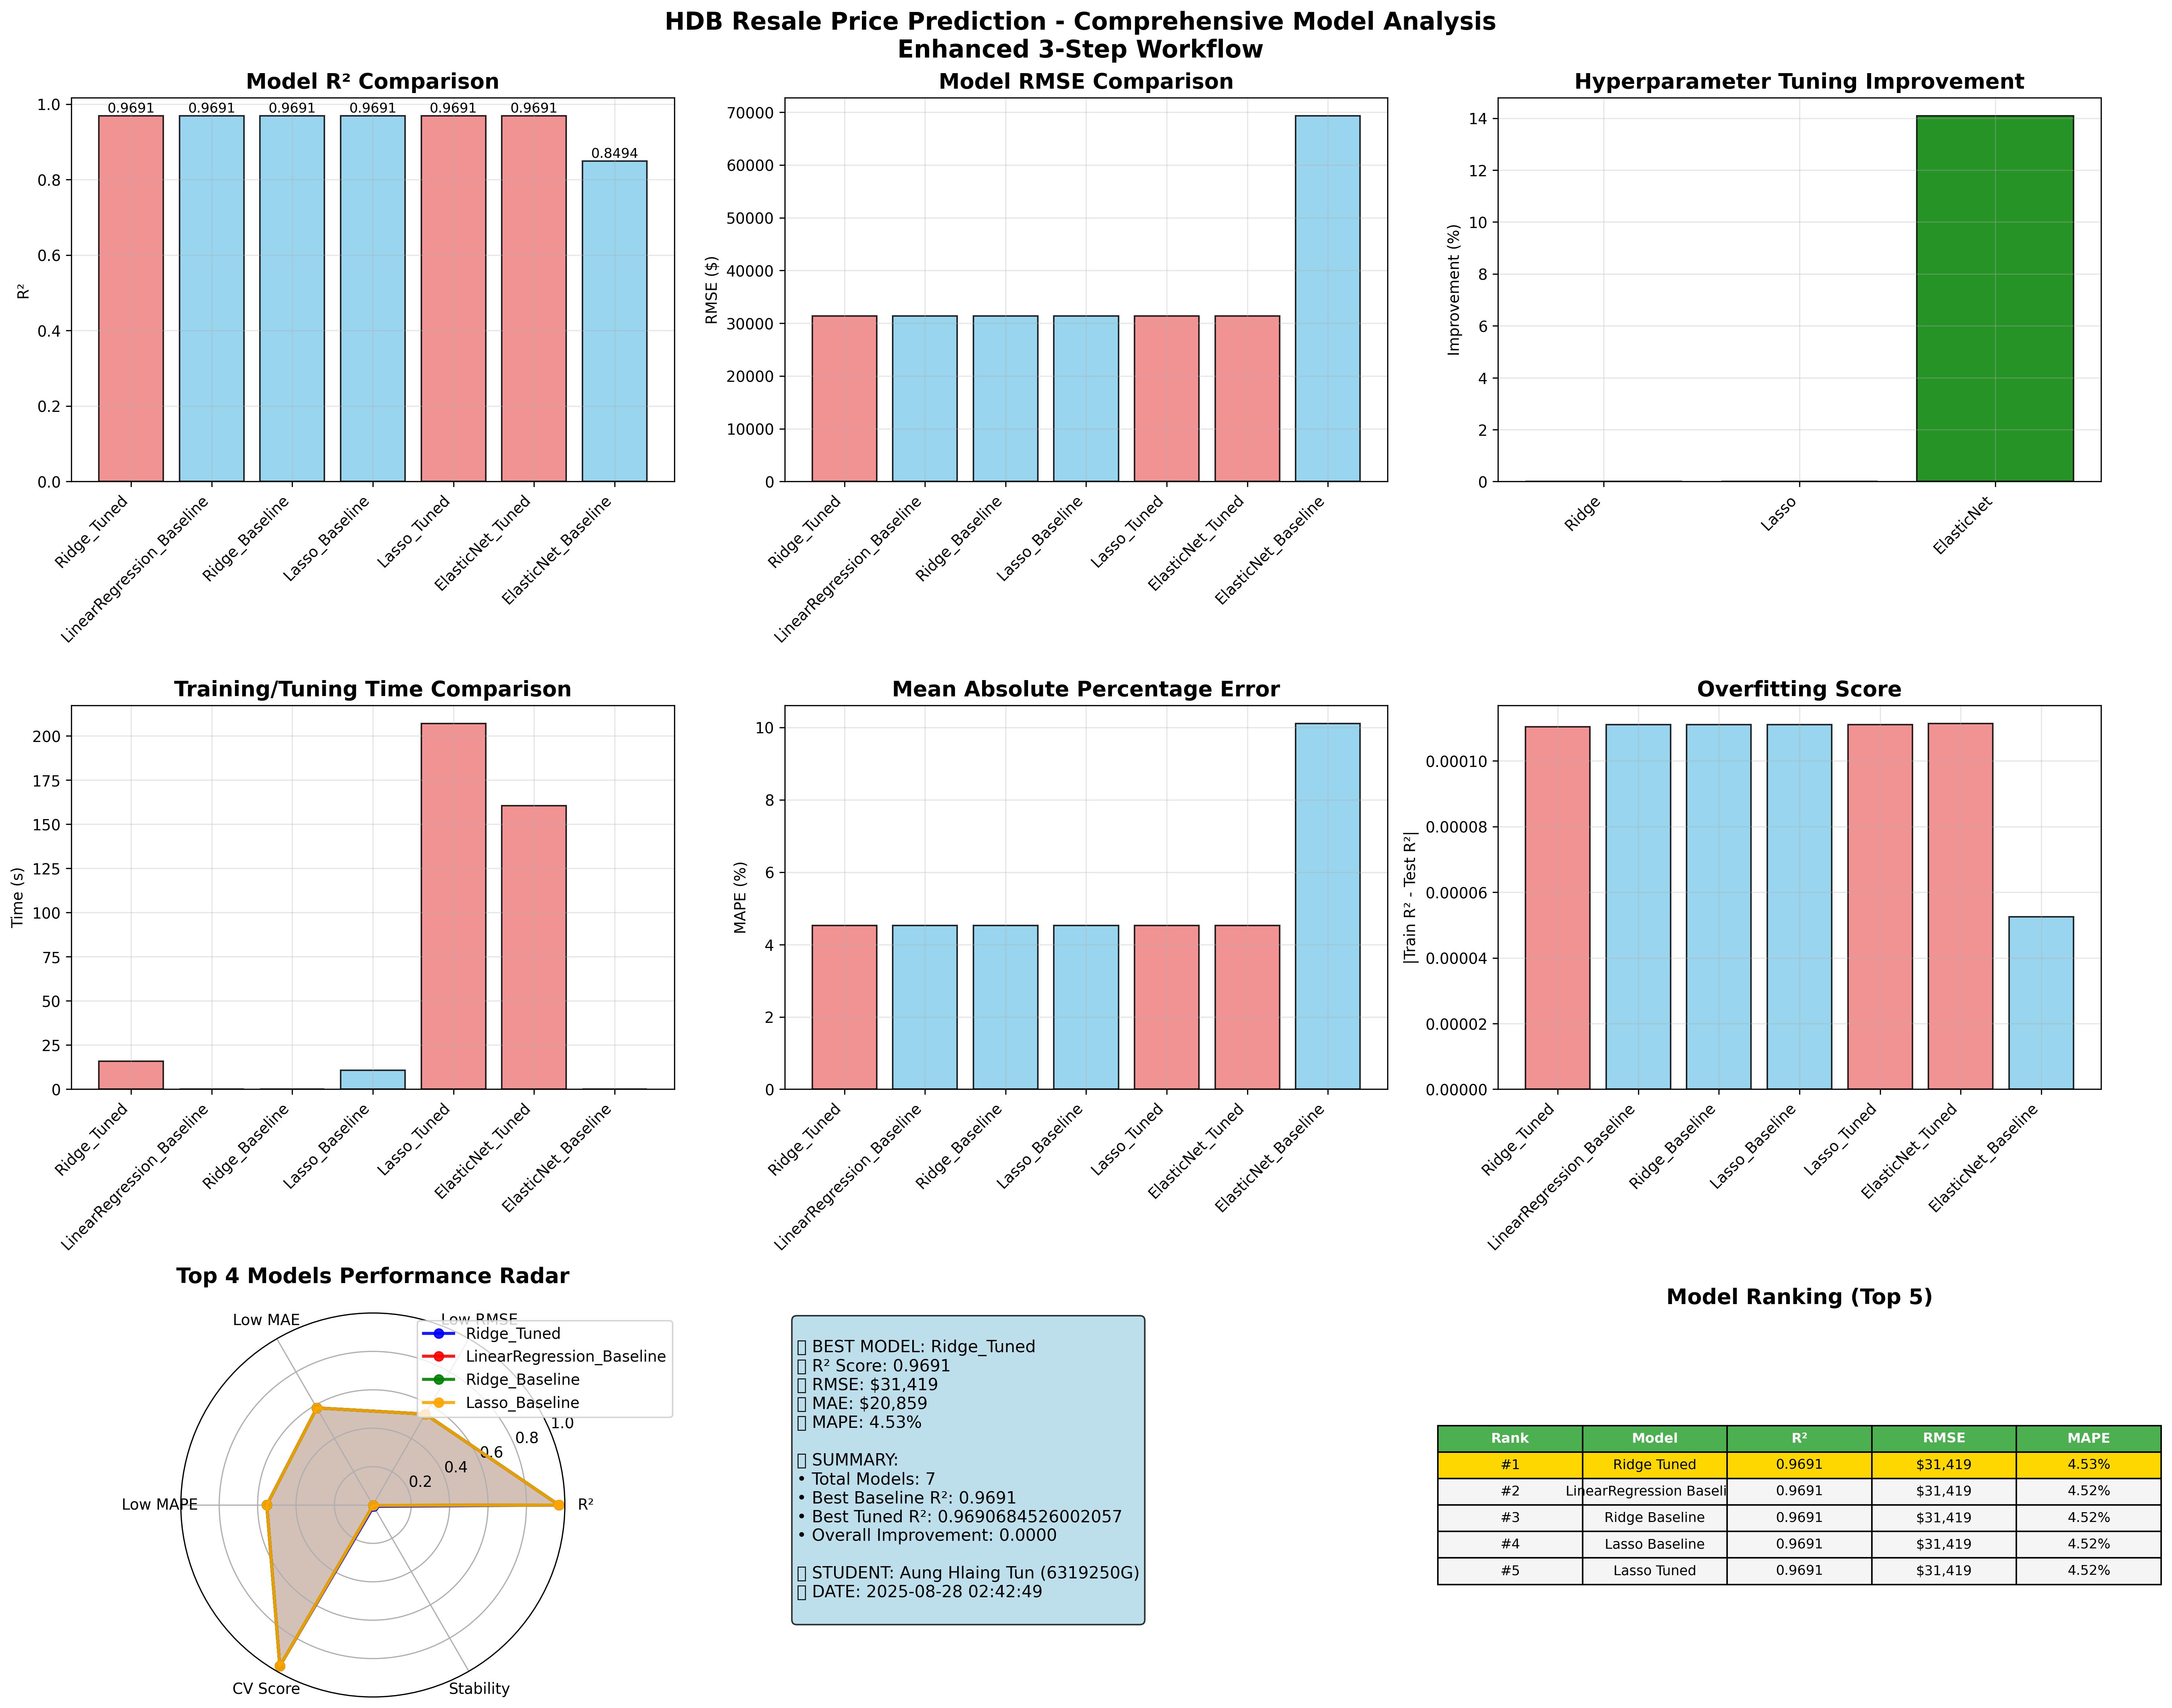